### How are in-demand skills trending for Data Analysts?

Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  


# Loading Data
df= pd.read_csv("data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_Uk = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [3]:
df_DA_Uk['job_posted_month_no'] =df_DA_Uk['job_posted_date'].dt.month

In [4]:
df_DA_Uk_explode = df_DA_Uk.explode('job_skills') # Exploding the job skills list to multiple rows

In [5]:
df_DA_Uk_pivot = df_DA_Uk_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_Uk_pivot.loc['Total'] = df_DA_Uk_pivot.sum()

df_DA_Uk_pivot = df_DA_Uk_pivot[df_DA_Uk_pivot.loc['Total'].sort_values(ascending=False).index]


df_DA_Uk_pivot


job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,1,0,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,0,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,0,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,0,0,0,0,0,1,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,0
9,211,167,130,99,87,58,24,24,15,11,...,0,0,1,0,0,0,1,0,0,0


In [6]:
DA_total = df_DA_Uk.groupby('job_posted_month_no').size()
DA_total

job_posted_month_no
1     519
2     355
3     237
4     175
5     202
6     215
7     253
8     212
9     369
10    369
11    266
12    205
dtype: int64

In [7]:
df_DA_Uk_pivot = df_DA_Uk_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)



df_DA_Uk_pivot

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


In [8]:

df_DA_UK_percent = df_DA_Uk_pivot.div(DA_total/100, axis= 0)
df_DA_UK_percent

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0.192678,0.000000,1.541426,0.000000,0.000000,0.192678,0.000000,1.926782,5.009634,0.192678,...,0.000000,3.082852,1.734104,0.578035,0.000000,0.000000,0.385356,0.000000,5.394990,0.000000
2,0.000000,0.000000,1.971831,0.000000,0.000000,0.000000,0.000000,2.253521,7.887324,0.563380,...,0.000000,1.971831,0.563380,0.000000,0.563380,0.000000,1.126761,0.000000,4.507042,0.000000
3,0.000000,0.000000,0.843882,0.000000,0.000000,0.000000,0.000000,2.953586,5.485232,0.000000,...,0.000000,4.219409,0.000000,0.421941,0.000000,0.000000,0.843882,0.000000,4.219409,0.421941
4,0.571429,0.000000,1.142857,0.000000,0.000000,0.000000,0.000000,4.000000,5.142857,0.000000,...,0.000000,2.857143,0.000000,0.571429,0.000000,0.000000,1.714286,0.000000,5.714286,0.000000
5,0.990099,0.000000,1.485149,0.000000,0.000000,0.495050,0.000000,3.960396,7.920792,0.000000,...,0.000000,3.465347,1.485149,0.000000,0.000000,0.000000,0.000000,0.000000,3.960396,0.000000
6,0.465116,0.000000,0.465116,0.000000,0.465116,0.000000,0.465116,6.976744,8.837209,0.000000,...,0.000000,4.186047,0.930233,0.000000,0.000000,0.000000,0.465116,0.000000,5.581395,0.000000
7,0.790514,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000,5.138340,12.252964,0.000000,...,0.000000,3.557312,0.000000,0.395257,0.790514,0.000000,1.185771,0.000000,6.324111,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.245283,8.018868,0.000000,...,0.000000,3.301887,0.000000,0.471698,0.471698,0.000000,1.886792,0.471698,5.188679,0.000000
9,0.542005,0.000000,1.084011,0.271003,0.000000,0.000000,0.271003,4.607046,6.504065,0.000000,...,0.000000,6.775068,0.000000,1.355014,0.271003,0.271003,0.271003,0.000000,3.523035,0.271003


In [9]:
#changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_DA_UK_percent= df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,0.192678,0.000000,1.541426,0.000000,0.000000,0.192678,0.000000,1.926782,5.009634,0.192678,...,0.000000,3.082852,1.734104,0.578035,0.000000,0.000000,0.385356,0.000000,5.394990,0.000000
February,0.000000,0.000000,1.971831,0.000000,0.000000,0.000000,0.000000,2.253521,7.887324,0.563380,...,0.000000,1.971831,0.563380,0.000000,0.563380,0.000000,1.126761,0.000000,4.507042,0.000000
March,0.000000,0.000000,0.843882,0.000000,0.000000,0.000000,0.000000,2.953586,5.485232,0.000000,...,0.000000,4.219409,0.000000,0.421941,0.000000,0.000000,0.843882,0.000000,4.219409,0.421941
April,0.571429,0.000000,1.142857,0.000000,0.000000,0.000000,0.000000,4.000000,5.142857,0.000000,...,0.000000,2.857143,0.000000,0.571429,0.000000,0.000000,1.714286,0.000000,5.714286,0.000000
May,0.990099,0.000000,1.485149,0.000000,0.000000,0.495050,0.000000,3.960396,7.920792,0.000000,...,0.000000,3.465347,1.485149,0.000000,0.000000,0.000000,0.000000,0.000000,3.960396,0.000000
June,0.465116,0.000000,0.465116,0.000000,0.465116,0.000000,0.465116,6.976744,8.837209,0.000000,...,0.000000,4.186047,0.930233,0.000000,0.000000,0.000000,0.465116,0.000000,5.581395,0.000000
July,0.790514,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000,5.138340,12.252964,0.000000,...,0.000000,3.557312,0.000000,0.395257,0.790514,0.000000,1.185771,0.000000,6.324111,0.000000
August,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.245283,8.018868,0.000000,...,0.000000,3.301887,0.000000,0.471698,0.471698,0.000000,1.886792,0.471698,5.188679,0.000000
September,0.542005,0.000000,1.084011,0.271003,0.000000,0.000000,0.271003,4.607046,6.504065,0.000000,...,0.000000,6.775068,0.000000,1.355014,0.271003,0.271003,0.271003,0.000000,3.523035,0.271003


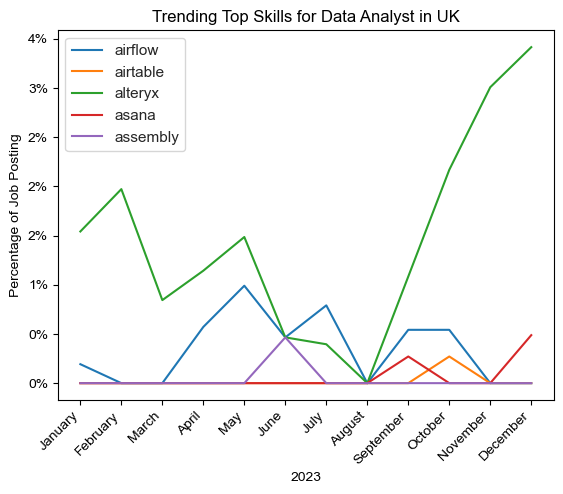

In [10]:
df_plot = df_DA_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.set_theme(style='ticks')
plt.xticks(rotation=45, ha='right')
plt.title('Trending Top Skills for Data Analyst in UK')
plt.ylabel('Percentage of Job Posting')
plt.xlabel('2023')
plt.legend()


ax= plt.gca()

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))



plt.show()
